<a href="https://colab.research.google.com/github/musaboy/PM-HPC-ML/blob/main/Abdullah_Musa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUCTION**

In [ ]:
print("""Hello my name is Abdullah Musa (Damza).
I am a 300LVL Mechatronics Engineering student in the Lagos State University of Science and Technology.
And this is my submission for the SAIL Data Science Bootcamp,
On the 1st of October 2024.""")

Hello my name is Abdullah Musa (Damza).
I am a 300LVL Mechatronics Engineering student in the Lagos State University of Science and Technology.
And this is my submission for the SAIL Data Science Bootcamp,
On the 1st of October 2024.


In [ ]:
print("""I designed this model to predict house prices in Chicago based on various property features,
Such as the number of bedrooms and bathrooms, size, tax , and condition of the house.""")
print("To achieve this, i used two types of regression models: Linear Regression and XGBoost (Extreme Gradient Boosting)")
print("Linear regression as a baseline for comparison, \nAnd XGBoost as the primary model to maximize predictive accuracy.")
print("In addition to linear regression, I implemented a Random Forest Regression model to improve predictive accuracy.")

I designed this model to predict house prices in Chicago based on various property features,
Such as the number of bedrooms and bathrooms, size, tax , and condition of the house.
To achieve this, i used two types of regression models: Linear Regression and XGBoost (Extreme Gradient Boosting)
Linear regression as a baseline for comparison, 
And XGBoost as the primary model to maximize predictive accuracy.
In addition to linear regression, I implemented a Random Forest Regression model to improve predictive accuracy.


# Data Acquisition/Loading

---



In [ ]:
# Import all the relevant libraries
import pandas as pd  # for data manipulation

import numpy as np  # for numerical operations


import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for visualization

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Display plots inline in Colab
%matplotlib inline

In [ ]:
# Installation of XGBoost
!pip install XGBoost

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset from upload
df = pd.read_csv('/content/drive/MyDrive/Chicago.csv')

In [ ]:
#df = pd.read_csv('/content/Chicago.csv')

In [ ]:
# View the first 5 columns
df.head(9)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
6,49.0,5.0,1400.0,8.0,NaN,678.0,1.0,1.0,1.0
7,70.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,0.0
8,72.0,4.0,1290.0,8.0,NaN,800.0,1.5,1.5,0.0


In [ ]:
# View the last 5 columns
df.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replace all 'NA' strings with actual NaN values in the dataframe
df.replace("NA", np.nan, inplace=True)

# Preliminary Data Analysis

In [ ]:
# Checking the column names
df.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

In [ ]:
# Checking the dimension
df.shape

(157, 9)

In [ ]:
# Check for datatypes
df.dtypes

,0
Price,float64
Bedroom,float64
Space,float64
Room,float64
Lot,float64
Tax,float64
Bathroom,float64
Garage,float64
Condition,float64


In [ ]:
# Check for more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [ ]:
# Lets check for mising values
df.isnull().sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [ ]:
# Check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# Lets check the unique values in "condition" and their counts
df['Condition'].value_counts()

,count
Condition,
0.0,120
1.0,36


# Data Cleaning

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [ ]:
# Fill in missing values using column mean
df.fillna(df.mean(), inplace=True)
print(df)

         Price   Bedroom        Space  Room        Lot          Tax  Bathroom  \
0    53.000000  2.000000   967.000000   5.0  39.000000   652.000000  1.500000   
1    55.000000  2.000000   815.000000   5.0  33.000000  1000.000000  1.000000   
2    56.000000  3.000000   900.000000   5.0  35.000000   897.000000  1.500000   
3    58.000000  3.000000  1007.000000   6.0  24.000000   964.000000  1.500000   
4    64.000000  3.000000  1100.000000   7.0  50.000000  1099.000000  1.500000   
..         ...       ...          ...   ...        ...          ...       ...   
152  44.000000  3.000000   820.000000   5.0  27.000000   911.707483  1.000000   
153  43.000000  2.000000   593.000000   4.0  30.000000   465.000000  2.000000   
154  53.000000  3.000000   716.000000   6.0  30.000000   585.000000  1.000000   
155  62.000000  4.000000   951.000000   7.0  30.000000   895.000000  2.000000   
156  56.474359  3.166667  1097.246575   6.5  32.808219   911.707483  1.480769   

       Garage  Condition  


In [ ]:
# View the unique values ("Condition")
df['Condition'].value_counts()

,count
Condition,
0.000000,120
1.000000,36
0.230769,1


# Exploratory Data Analysis(EDA)

Histogram Plotting

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Space'}>],
       [<Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Lot'}>, <Axes: title={'center': 'Tax'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Garage'}>,
        <Axes: title={'center': 'Condition'}>]], dtype=object)

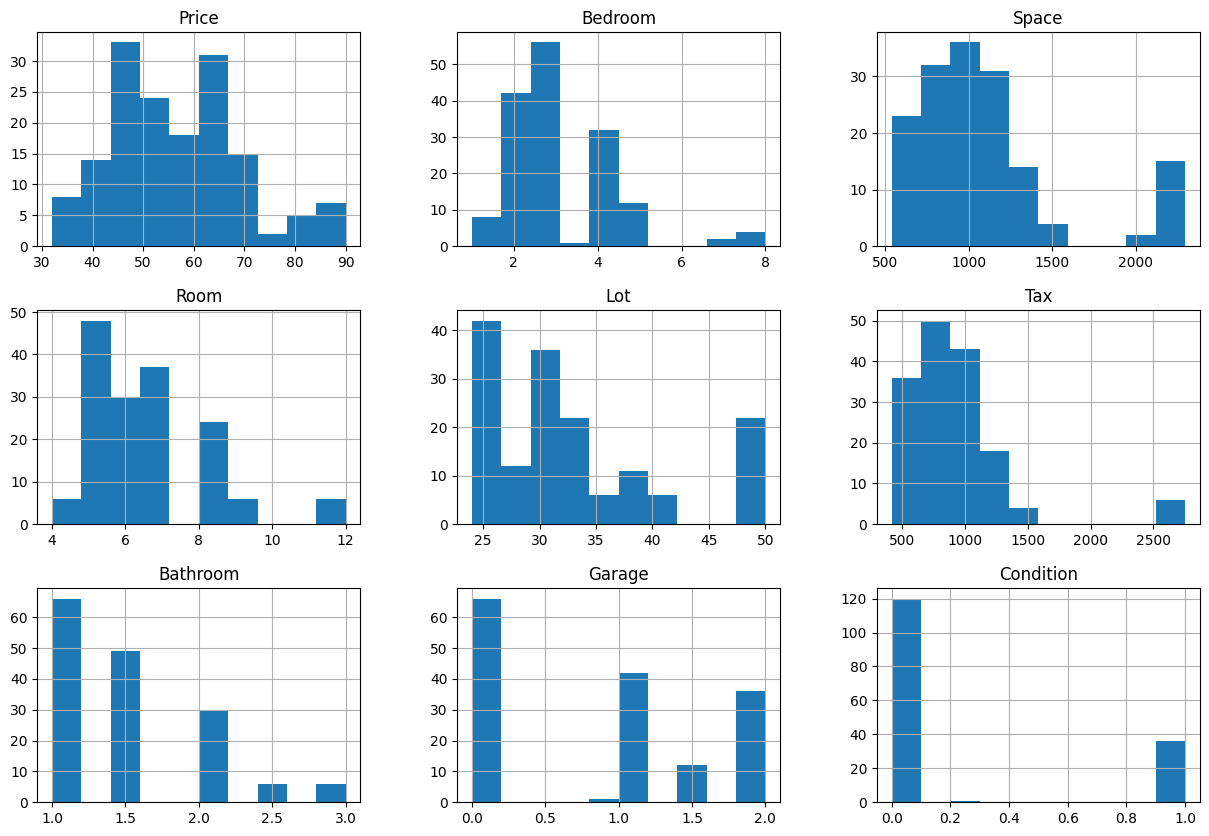

In [ ]:
# Plot histograms for all columns to visualize the distribution of each variable
df.hist(figsize=(15, 10))

In [ ]:
# Displaying all the coulumns to visualize the data
df.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

In [ ]:
# Importing seaborn libary as sns
import seaborn as sns

Box Plot

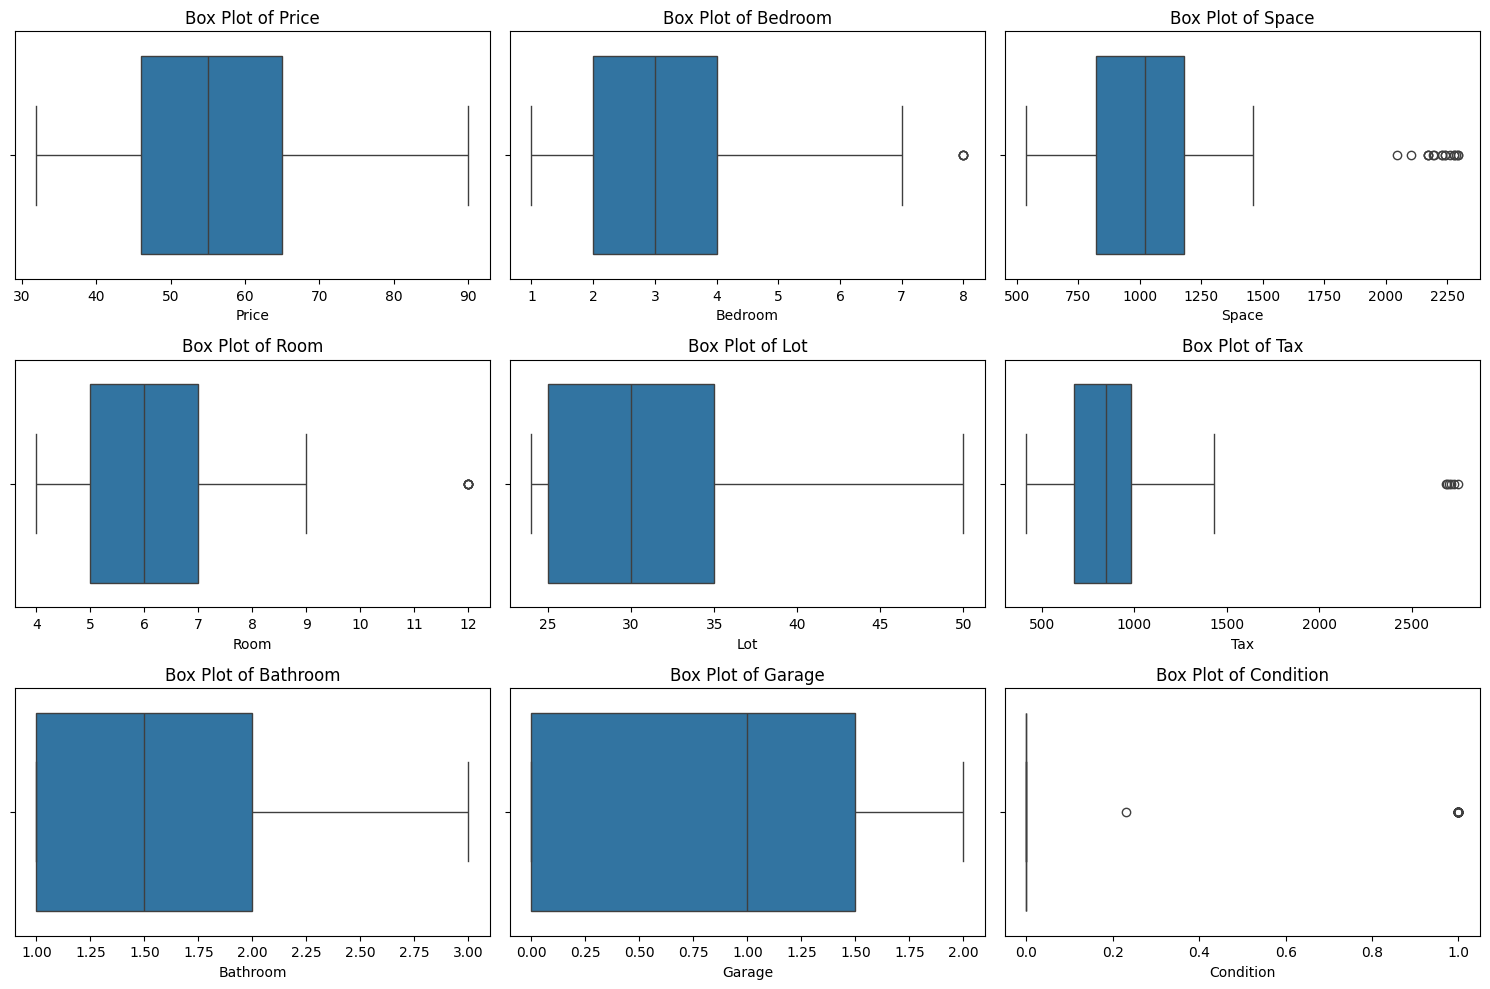

In [ ]:
# Plotting box plots for each column to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

Chart of distribution

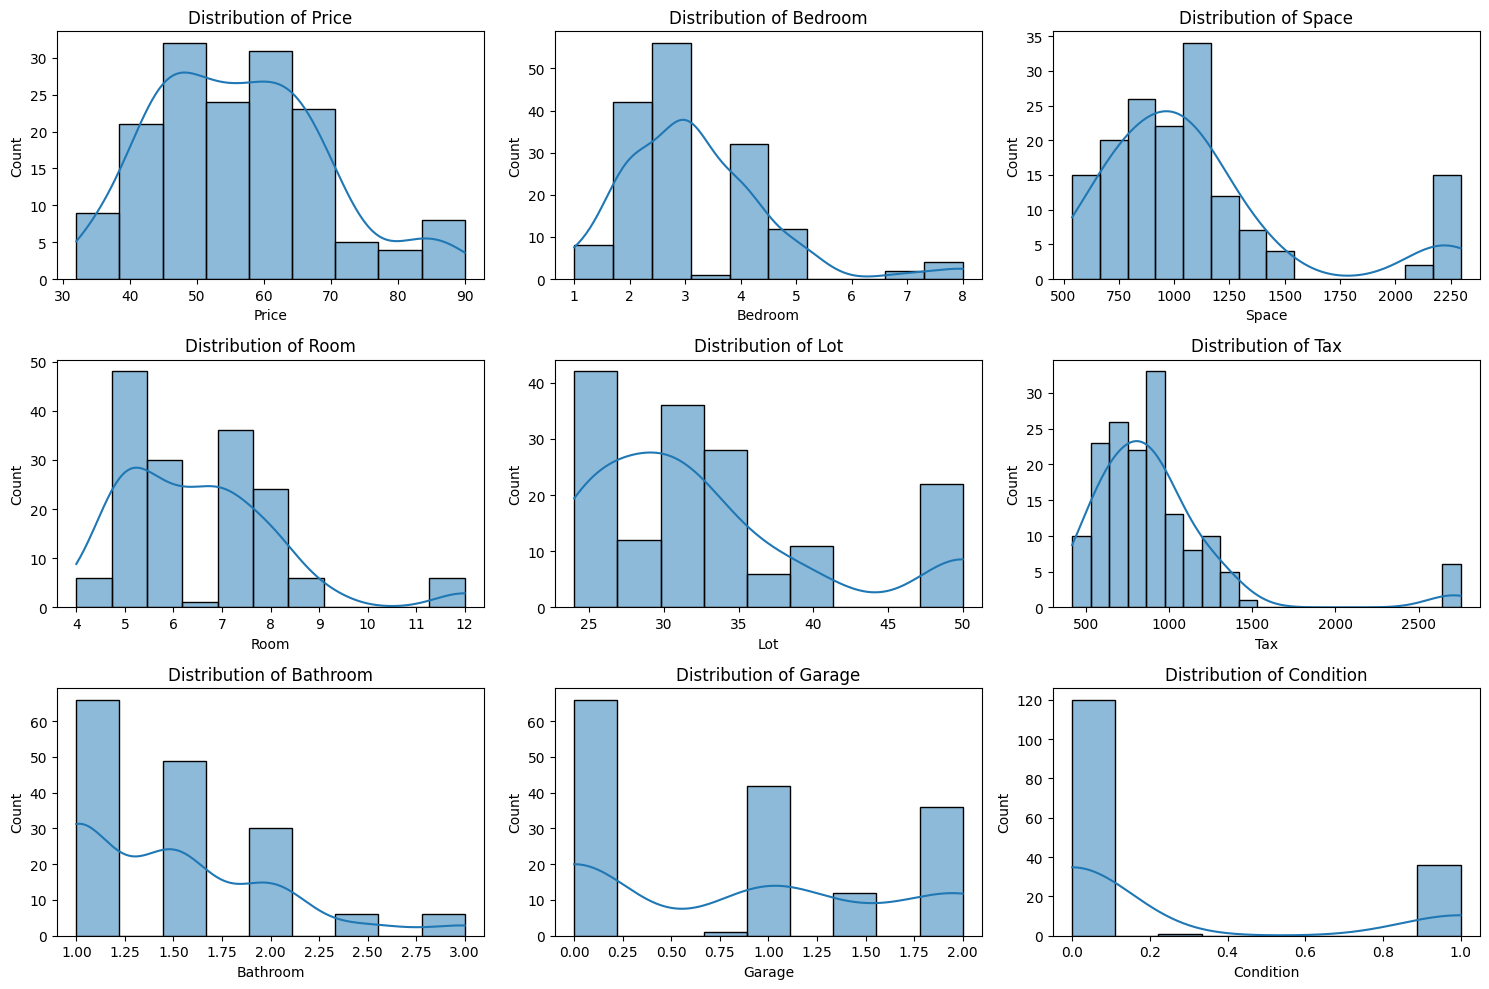

In [ ]:
# Ploting of distribution plots to visualize the distribution of each variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

Heat Map of Features

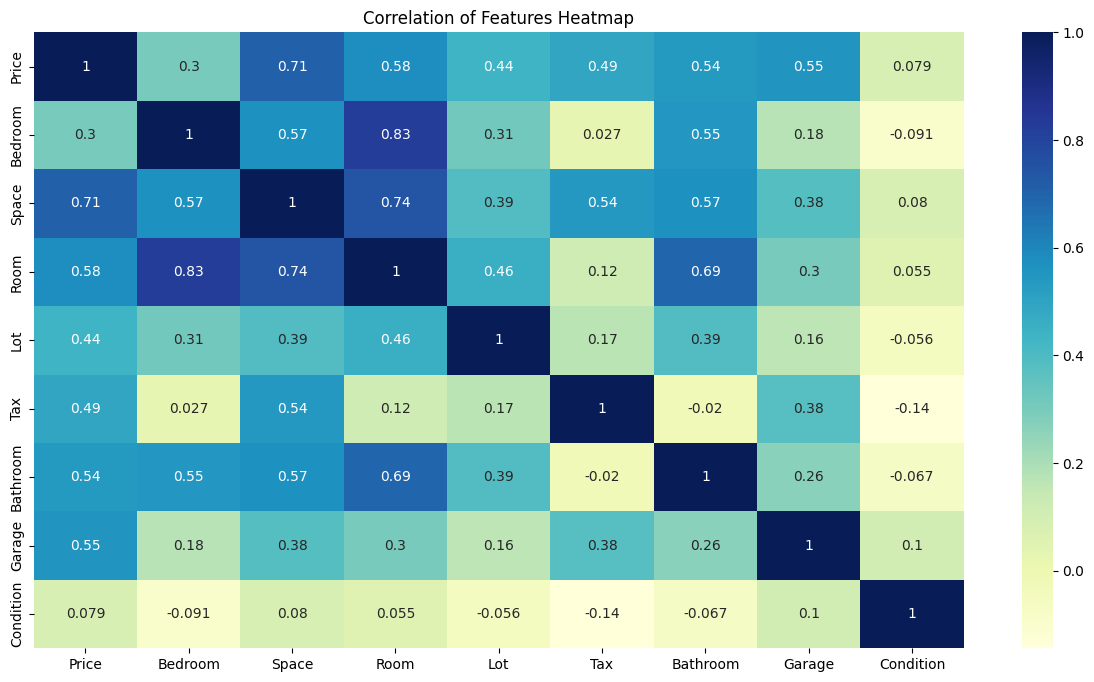

In [ ]:
# Plot Heat Map to Check the relationship between the features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # cmap="YlGnBu" is a colour code
plt.title("Correlation of Features Heatmap")
plt.show()


Count Plot of conditions

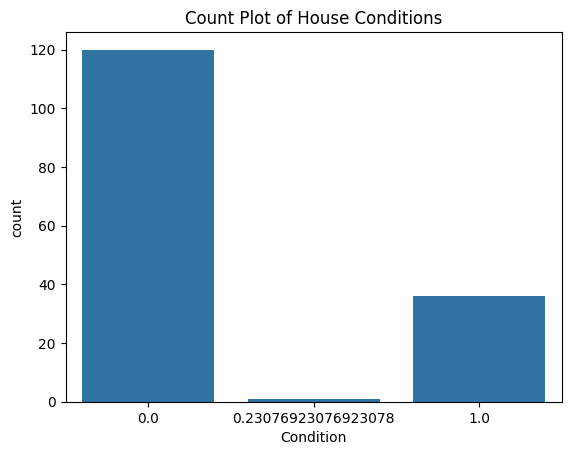

In [ ]:
# Plot count plot for the 'Condition' column
sns.countplot(x='Condition', data=df)
plt.title("Count Plot of House Conditions")
plt.show()

Scatter Plot of relevant data

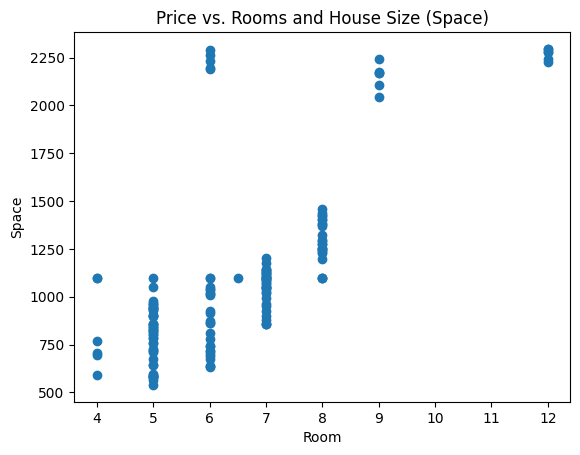

0.7448185987441975
0.5784800646011793
0.7091742280605345


In [ ]:
# Scatter plot for 'Price' vs 'Rooms and House Size (space)'
plt.scatter(df['Room'], df['Space'])
plt.xlabel('Room')
plt.ylabel('Space')
plt.title('Price vs. Rooms and House Size (Space)')
plt.show()

print(df['Space'].corr(df['Room']))
print(df['Price'].corr(df['Room']))
print(df['Price'].corr(df['Space']))

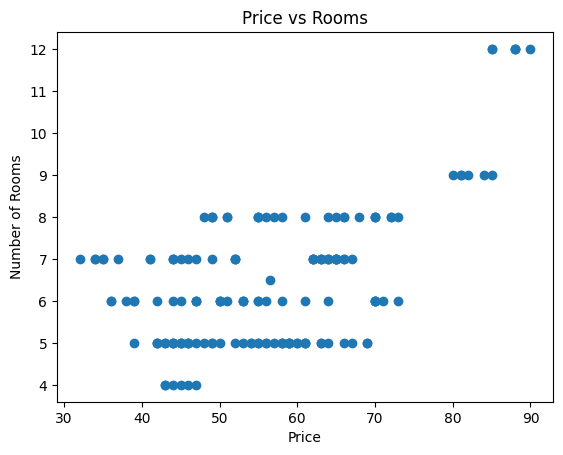

0.5784800646011793


In [ ]:
# Scatter plot for 'Price' vs 'Room'
plt.scatter(df['Price'], df['Room'])
plt.title("Price vs Rooms")
plt.xlabel("Price")
plt.ylabel("Number of Rooms")
plt.show()

print(df['Price'].corr(df['Room']))

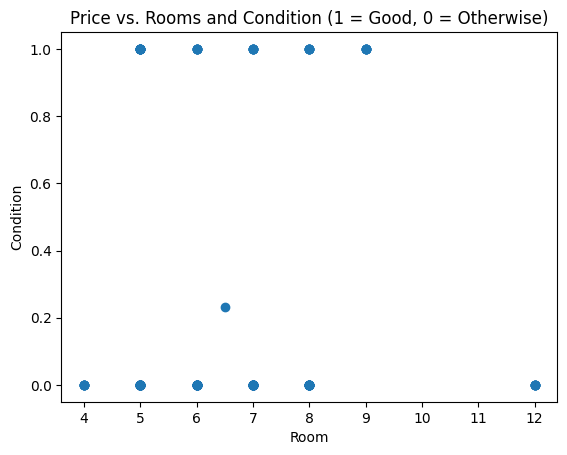

0.054667227359053425
0.5784800646011793
0.07933647160479358


In [ ]:
# Scatter plot for 'Room' vs 'Condition'
plt.scatter(df['Room'], df['Condition'])
plt.xlabel('Room')
plt.ylabel('Condition')
plt.title('Price vs. Rooms and Condition (1 = Good, 0 = Otherwise)')
plt.show()

print(df['Condition'].corr(df['Room']))
print(df['Price'].corr(df['Room']))
print(df['Price'].corr(df['Condition']))

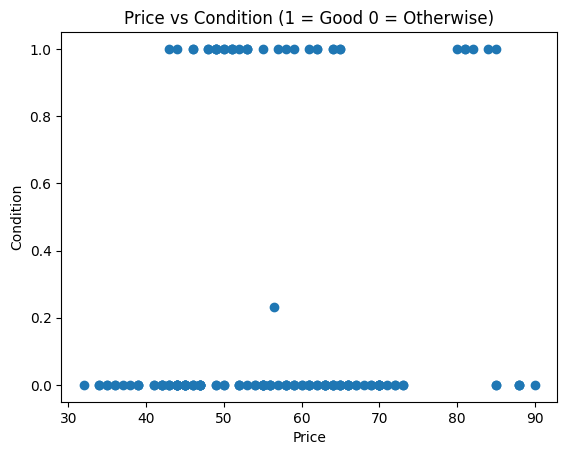

0.07933647160479358


In [ ]:
# Scatter plot for 'Price' vs 'Condition'
plt.scatter(df['Price'], df['Condition'])
plt.title("Price vs Condition (1 = Good 0 = Otherwise)")
plt.xlabel("Price")
plt.ylabel("Condition")
plt.show()

print(df['Price'].corr(df['Condition']))

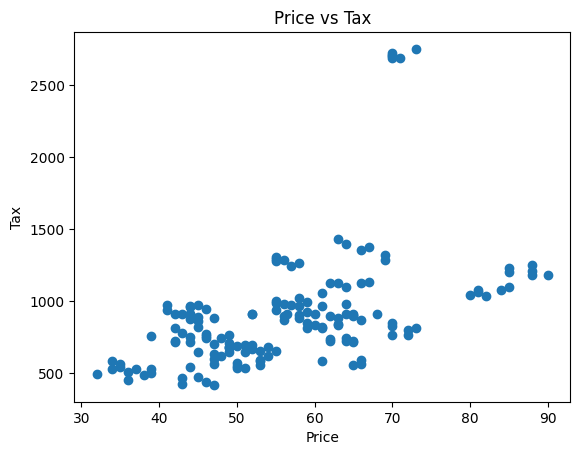

0.49398654667163716


In [ ]:
# Scatter plot for 'Price' vs 'Tax'
plt.scatter(df['Price'], df['Tax'])
plt.title("Price vs Tax")
plt.xlabel("Price")
plt.ylabel("Tax")
plt.show()

print(df['Price'].corr(df['Tax']))

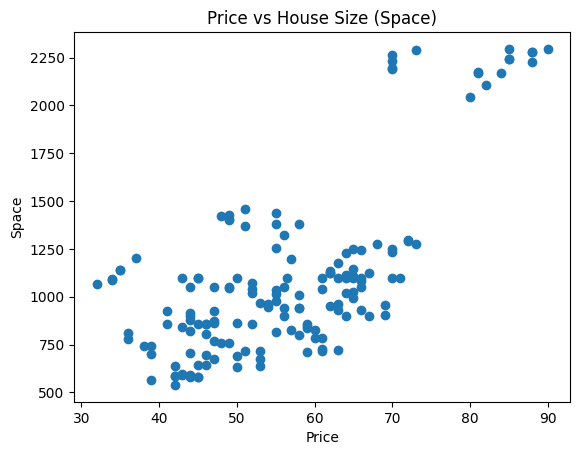

0.7091742280605345


In [ ]:
# Scatter plot for 'Price' vs 'Space'
plt.scatter(df['Price'], df['Space'])
plt.title("Price vs House Size (Space)")
plt.xlabel("Price")
plt.ylabel("Space")
plt.show()

print(df['Price'].corr(df['Space']))

# Model Training

In [ ]:
# Assigning features (X) and target (y)
x = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Baseline Model: Linear Regression

In [ ]:
# Initialize and train Linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

# Print Results
print('Training Score: ', reg.score(x_train, y_train))
print('Testing Score: ', reg.score(x_test, y_test))
print("R²:", r2)
print("RMSE:", rmse)


Training Score:  0.7325856305813303
Testing Score:  0.5929532558940398
R²: 0.5929532558940398
RMSE: 68.73842888454986


Optimized Model: XGBoost

In [ ]:
# Initialize and train XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
xgb_r2 = r2_score(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)

print("XGBoost R²:", xgb_r2)
print("XGBoost MSE:", xgb_mse)

XGBoost R²: 0.8311393814756485
XGBoost MSE: 28.515677341508763


Random Forest Regressor

In [ ]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,
 y, test_size=0.2, random_state=42)

# Creating a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)#n_estimator is the number of decision trees

# Train the model
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)


# Evaluate the model
rf_r2 = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)

print("Random Forest R²:", rf_r2)
print("Random Forest MSE:", rf_mse)

Random Forest R²: 0.8693300603453602
Random Forest MSE: 22.066375629725513


# Model Testing

Comparison Between Linear Regression and XGBoost

In [ ]:
# Compare performance between Linear Regression and XGBoost
print("Model Comparison:")
print(f"Linear Regression - R²: {r2}, MSE: {rmse}")
print(f"XGBoost - R²: {xgb_r2}, MSE: {xgb_mse}")

import pandas as pd
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "XGBoost"],
    "R² Score": [r2, xgb_r2],
    "Mean Squared Error": [rmse, xgb_mse]
})
print(results_df)

Model Comparison:
Linear Regression - R²: 0.5929532558940398, MSE: 68.73842888454986
XGBoost - R²: 0.8311393814756485, MSE: 28.515677341508763
               Model  R² Score  Mean Squared Error
0  Linear Regression  0.592953           68.738429
1            XGBoost  0.831139           28.515677


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate Linear Regression
linear_cv_scores = cross_val_score(reg, x, y, cv=5, scoring='r2')
print("Linear Regression CV R²:", linear_cv_scores.mean())

# Cross-validate XGBoost
xgb_cv_scores = cross_val_score(xgb, x, y, cv=5, scoring='r2')
print("XGBoost CV R²:", xgb_cv_scores.mean())

Linear Regression CV R²: 0.6843138539111655
XGBoost CV R²: 0.8967212605025392


Comparative Feature Importance with XGBoost

<Figure size 1000x600 with 0 Axes>

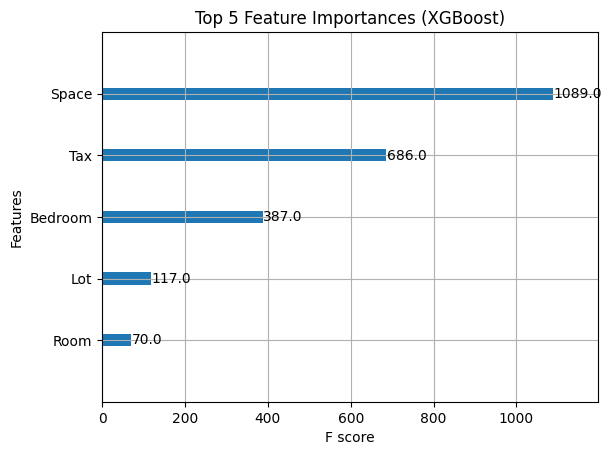

In [ ]:
from xgboost import plot_importance

# Plot feature importance for the XGBoost model
plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=5)
plt.title("Top 5 Feature Importances (XGBoost)")
plt.show()

Residual Distribution with XGBoost

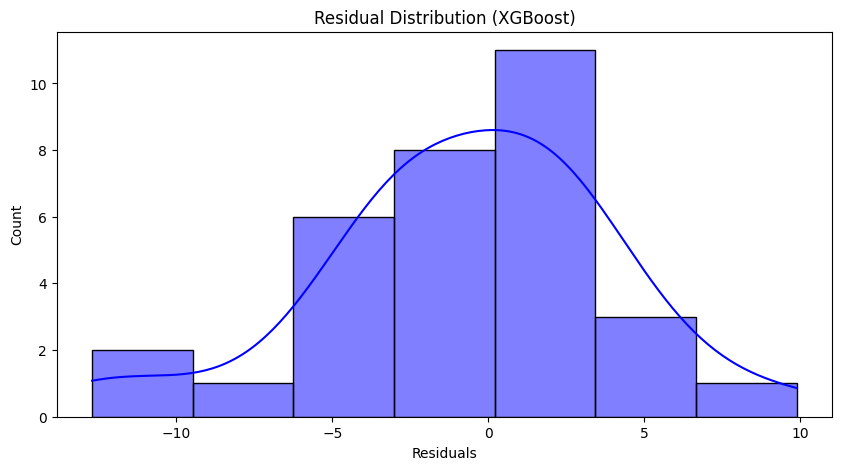

In [ ]:
# Residual Distribution = actual value- predicted y value
residuals_xgb = y_test - y_pred
# Formula: (residual distribution) = (actual value) - (predicted y value)

# Plot residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_xgb, kde=True, color="blue") #histogram plot of the  residual distribution
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.show()

Projected Prices and Actual Prices scatter plot

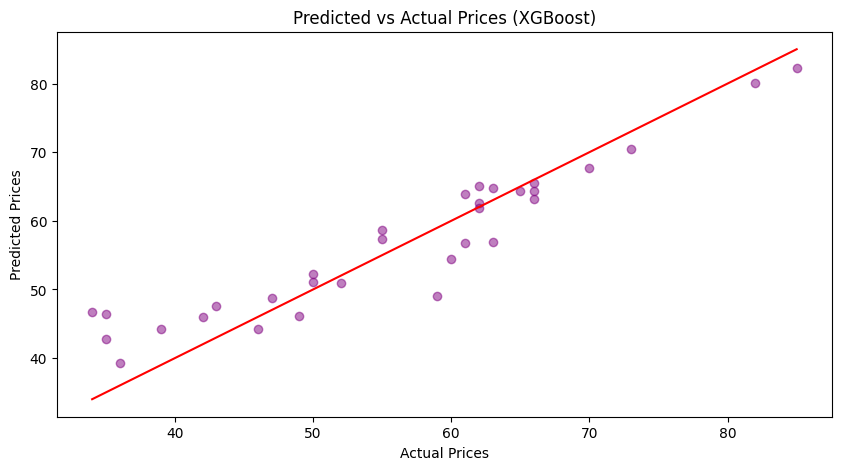

In [ ]:
# Plot Predicted vs Actual for XGBoost
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="purple", alpha=0.5) # y_test vs y_pred
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (XGBoost)")
plt.show()

## End
Thanks for your time, everyone.
I hope this presentation was informative and insightful.